In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import re

# Credit score classification:

The extensive dataset of customer banking and credit-related details collected over the years. The goal is to develop ML model capable of categorizing individuals into predefined credit score, thereby minimizing manual effort and improving efficiency.

Objective
Build a machine learning model that can classify a person's credit score based on their credit-related information.

### Data Loading and Overview:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

In [ ]:
train_df = pd.read_csv(f"{path}/train.csv")

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [117]:
train_df.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

In [118]:
train_df.describe(include = 'object').T

count  unique                               top  \
ID                       100000  100000                           0x25fd5   
Customer_ID              100000   12500                        CUS_0x942c   
Month                    100000       8                           January   
Name                      90015   10139                            Stevex   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          17273.83   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [119]:
# check for duplicates

def duplicate_values(df):

    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(train_df)

There are no duplicated observations in the dataset.


In [120]:
pd.set_option('display.max_columns', None)
train_df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

# Data Cleaning and Preprocessing: 

In [121]:
#We have target "credit_score " values only in train_df, let's use it for train and test:

In [122]:
#Lower case for column names:

train_df.columns = train_df.columns.str.lower()

In [123]:
train_df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

Month column:

In [124]:
train_df['month'].value_counts()

month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

Occupation column:

In [125]:
train_df['occupation'].value_counts()

occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [126]:
train_df.groupby("customer_id")["occupation"].value_counts().head(30)

customer_id  occupation   
CUS_0x1000   Lawyer           8
CUS_0x1009   Mechanic         7
             _______          1
CUS_0x100b   Media_Manager    8
CUS_0x1011   Doctor           8
CUS_0x1013   Mechanic         8
CUS_0x1015   Journalist       8
CUS_0x1018   Accountant       8
CUS_0x1026   Manager          7
             _______          1
CUS_0x102d   Entrepreneur     7
             _______          1
CUS_0x102e   Scientist        8
CUS_0x1032   Lawyer           8
CUS_0x1037   Accountant       8
CUS_0x1038   Architect        8
CUS_0x103e   Scientist        8
CUS_0x1041   Teacher          8
CUS_0x1044   Entrepreneur     7
             _______          1
CUS_0x1048   Accountant       8
CUS_0x104a   Mechanic         8
CUS_0x104e   Teacher          7
             _______          1
CUS_0x104f   Architect        7
             _______          1
CUS_0x1051   Engineer         7
             _______          1
CUS_0x1056   Entrepreneur     8
CUS_0x1057   Writer           7
Name: count, 

In [127]:
train_df["occupation"] = train_df.groupby("customer_id")["occupation"].transform(lambda x: x.where(x != "_______", x[x != "_______"].mode().iloc[0]))

print(train_df["occupation"].value_counts())

occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64


Age column:

In [128]:
pd.set_option('display.max_rows', None)
train_df['age'].value_counts()

age
38       2833
28       2829
31       2806
26       2792
32       2749
25       2737
36       2720
35       2716
34       2707
27       2707
39       2705
44       2688
19       2650
22       2641
41       2638
37       2605
43       2605
20       2603
30       2602
21       2594
29       2575
24       2553
23       2537
45       2501
40       2477
42       2441
33       2429
18       2270
46       1538
15       1488
17       1438
16       1378
48       1330
49       1307
55       1299
53       1287
52       1283
54       1236
51       1224
50       1205
47       1165
14       1129
-500      886
56        348
38_       161
24_       161
29_       160
26_       153
27_       152
35_       150
31_       149
36_       148
41_       147
22_       144
19_       143
45_       141
20_       141
39_       141
28_       139
37_       137
42_       136
44_       136
32_       135
40_       132
34_       130
43_       129
30_       125
25_       124
21_       122
23_       117
18_       115
33

In [129]:
train_df = train_df.replace("_", "", regex=True)

In [130]:
# # Convert columns to appropriate data types
train_df['age'] = pd.to_numeric(train_df['age'], errors='coerce')

In [131]:
#Let's check for outliers:

train_df['age'].value_counts(ascending=False).head()

age
38    2994
28    2968
31    2955
26    2945
32    2884
Name: count, dtype: int64

In [132]:
train_df['age'].sort_values().unique()

array([-500,   14,   15, ..., 8682, 8697, 8698])

In [133]:
train_df.groupby(["customer_id"])['age'].value_counts()

customer_id  age  
CUS0x1000     17      5
              18      3
CUS0x1009     26      6
              25      2
CUS0x100b     18      4
              19      4
CUS0x1011     44      7
              43      1
CUS0x1013     44      6
              43      2
CUS0x1015     27      7
              4510    1
CUS0x1018     15      8
CUS0x1026     51      4
              52      4
CUS0x102d     30      5
              31      3
CUS0x102e     26      6
              25      2
CUS0x1032     40      7
              1853    1
CUS0x1037     44      5
              45      3
CUS0x1038     27      6
              28      2
CUS0x103e     40      8
CUS0x1041     15      6
              14      2
CUS0x1044     44      8
CUS0x1048     27      6
              26      1
              1217    1
CUS0x104a     37      5
             -500     2
              36      1
CUS0x104e     50      8
CUS0x104f     20      5
              19      2
              2074    1
CUS0x1051     41      4
              42     

In [134]:
train_df.age.value_counts().sort_index().head(50)

age
-500     886
 14     1175
 15     1574
 16     1455
 17     1502
 18     2385
 19     2793
 20     2744
 21     2716
 22     2785
 23     2654
 24     2714
 25     2861
 26     2945
 27     2859
 28     2968
 29     2735
 30     2727
 31     2955
 32     2884
 33     2543
 34     2837
 35     2866
 36     2868
 37     2742
 38     2994
 39     2846
 40     2609
 41     2785
 42     2577
 43     2734
 44     2824
 45     2642
 46     1621
 47     1227
 48     1385
 49     1375
 50     1273
 51     1291
 52     1356
 53     1354
 54     1311
 55     1366
 56      362
 95        3
 99        1
 100       1
 102       1
 109       1
 111       1
Name: count, dtype: int64

In [135]:
train_df.loc[(train_df["age"] < 18) | (train_df["age"] > 56), "age"] = pd.NA

train_df["age"] = train_df.groupby("customer_id")["age"].transform(lambda x: x.ffill().bfill())

train_df["age"].isna().sum()

np.int64(5504)

In [136]:
train_df.groupby(["customer_id"])['age'].value_counts(dropna = False)

customer_id  age 
CUS0x1000    18.0    8
CUS0x1009    26.0    6
             25.0    2
CUS0x100b    18.0    4
             19.0    4
CUS0x1011    44.0    7
             43.0    1
CUS0x1013    44.0    6
             43.0    2
CUS0x1015    27.0    8
CUS0x1018    NaN     8
CUS0x1026    51.0    4
             52.0    4
CUS0x102d    30.0    5
             31.0    3
CUS0x102e    26.0    6
             25.0    2
CUS0x1032    40.0    8
CUS0x1037    44.0    5
             45.0    3
CUS0x1038    27.0    6
             28.0    2
CUS0x103e    40.0    8
CUS0x1041    NaN     8
CUS0x1044    44.0    8
CUS0x1048    27.0    6
             26.0    2
CUS0x104a    37.0    6
             36.0    2
CUS0x104e    50.0    8
CUS0x104f    20.0    6
             19.0    2
CUS0x1051    41.0    5
             42.0    3
CUS0x1056    44.0    8
CUS0x1057    46.0    5
             45.0    3
CUS0x105b    24.0    8
CUS0x105c    54.0    8
CUS0x1063    20.0    5
             19.0    3
CUS0x1069    32.0    8
CUS0x106f    54.

In [137]:
#let's drop rows where age is not available :
train_df = train_df[train_df['age'].notna()]

Annual Income column:

In [138]:
train_df[pd.to_numeric(train_df["annual_income"],errors="coerce").isna()]["annual_income"].head(20)

Series([], Name: annual_income, dtype: object)

In [139]:
train_df["annual_income"] = train_df["annual_income"].str.strip("_")

train_df["annual_income"] = pd.to_numeric(train_df["annual_income"], downcast="integer")

train_df["annual_income"].dtype

dtype('float64')

In [140]:
train_df.groupby("customer_id")["annual_income"].unique().sample(20)

customer_id
CUS0x59a2                [35350.24]
CUS0x55bd               [105521.58]
CUS0x7a15     [62877.88, 2766948.0]
CUS0x63b7               [10095.545]
CUS0x7546               [11866.345]
CUS0x284a    [131313.4, 10909427.0]
CUS0x6133                 [85862.6]
CUS0x80ae               [118151.16]
CUS0x4ad5                [31592.03]
CUS0x4cb4                [34829.92]
CUS0x97d5                [18736.83]
CUS0x10c0                [49454.13]
CUS0x60f                [167664.88]
CUS0x4fd4    [39110.82, 12395391.0]
CUS0xc4bd                [15289.33]
CUS0x1b4d               [140919.04]
CUS0x8cdb                 [92650.2]
CUS0x7088    [81223.36, 20022143.0]
CUS0x27ae               [120061.95]
CUS0xbe9     [14664.91, 10648580.0]
Name: annual_income, dtype: object

In [141]:
filtered_df = train_df.groupby("customer_id")["annual_income"].agg(
    lambda x: x.mode().iloc[0])

# Replace 'annual_income' values if they exceed 1.5 years' worth of 'monthly_inhand_salary',
# to account for possible bonuses or other income sources.
train_df.loc[train_df["annual_income"] > train_df["monthly_inhand_salary"] * 18,
        "annual_income"] = train_df["customer_id"].map(filtered_df)

In [142]:
train_df.groupby("customer_id")["annual_income"].value_counts().value_counts()
#all annual_income values of customers are one unique value

count
8    11673
7      139
1      139
Name: count, dtype: int64

In [143]:
#pd.options.display.float_format = '{:.2f}'.format
train_df.annual_income.head()

0    19114.12
1    19114.12
2    19114.12
3    19114.12
4    19114.12
Name: annual_income, dtype: float64

Num credit cards column:

In [144]:
train_df["num_credit_card"].value_counts().sort_index().head(30)

num_credit_card
0        13
1      2132
2      2149
3     12797
4     13551
5     17402
6     15678
7     15623
8      4566
9      4147
10     4248
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
25        5
26        1
27        3
28        4
29        2
31        2
33        2
34        2
36        3
37        4
Name: count, dtype: int64

In [145]:
train_df.loc[train_df["num_credit_card"] > 11, "num_credit_card"] = pd.NA

train_df["num_credit_card"] = train_df.groupby("customer_id")["num_credit_card"].transform(lambda x: x.ffill().bfill())


In [146]:
train_df["num_credit_card"].value_counts().sort_index().head(30)

num_credit_card
0.0        14
1.0      2185
2.0      2193
3.0     13072
4.0     13875
5.0     17822
6.0     16035
7.0     16005
8.0      4676
9.0      4244
10.0     4339
11.0       36
Name: count, dtype: int64

In [147]:
train_df["num_credit_card"].isna().sum()

np.int64(0)

Num bank accounts column:

In [148]:
train_df["num_bank_accounts"].value_counts().sort_index().head(30)

num_bank_accounts
-1        21
 0      4328
 1      4490
 2      4299
 3     11502
 4     11789
 5     11628
 6     11967
 7     11844
 8     11712
 9      4920
 10     4734
 11        9
 18        1
 26        1
 27        1
 28        1
 29        1
 30        1
 31        1
 32        1
 33        2
 34        4
 35        1
 37        3
 39        3
 40        1
 41        1
 42        2
 43        4
Name: count, dtype: int64

In [149]:
train_df.loc[(train_df["num_bank_accounts"] < 0) | (train_df["num_bank_accounts"] > 11), "num_bank_accounts",] = pd.NA
train_df["num_bank_accounts"] = train_df.groupby( "customer_id")["num_bank_accounts"].transform(lambda x: x.ffill().bfill())

train_df["num_bank_accounts"].isna().sum()

np.int64(0)

Interest rate column:

In [150]:
train_df["interest_rate"].value_counts().sort_index()

interest_rate
1       2683
2       2465
3       2765
4       2589
5       4836
6       4605
7       4406
8       4855
9       4343
10      4429
11      4304
12      4471
13      2169
14      2098
15      3727
16      3401
17      3496
18      3759
19      3418
20      3661
21      1418
22      1580
23      1551
24      1523
25      1372
26      1378
27      1434
28      1431
29      1442
30      1476
31      1300
32      1547
33      1286
34      1352
60         1
64         1
67         1
73         1
74         1
75         2
76         2
77         1
81         1
87         1
89         1
91         1
92         1
94         1
95         1
98         1
99         1
100        1
101        1
102        1
106        1
107        1
108        1
113        1
115        2
120        1
128        2
136        1
137        1
140        1
142        1
144        1
146        2
151        1
159        1
160        1
162        1
170        1
174        1
177        1
186        1
197        

In [151]:
train_df.loc[train_df["interest_rate"] > 34, "interest_rate"] = pd.NA

train_df["interest_rate"] = train_df.groupby("customer_id")["interest_rate"].transform(lambda x: x.ffill().bfill())


In [152]:
train_df["interest_rate"].value_counts().sort_index().head(40)

interest_rate
1.0     2744
2.0     2520
3.0     2824
4.0     2640
5.0     4952
6.0     4712
7.0     4496
8.0     4944
9.0     4424
10.0    4504
11.0    4384
12.0    4576
13.0    2216
14.0    2136
15.0    3800
16.0    3464
17.0    3568
18.0    3840
19.0    3488
20.0    3736
21.0    1448
22.0    1608
23.0    1584
24.0    1568
25.0    1408
26.0    1416
27.0    1464
28.0    1456
29.0    1472
30.0    1512
31.0    1328
32.0    1576
33.0    1312
34.0    1376
Name: count, dtype: int64

Num loan column:

In [153]:
train_df['num_of_loan'].value_counts()

num_of_loan
3       14493
2       14448
4       14114
0       10784
1       10505
6        6893
7        6535
5        6405
-100     3680
9        3285
8        2908
1228        3
1480        3
430         3
352         2
1017        2
875         2
192         2
229         2
1127        2
50          2
1225        2
33          2
501         2
227         2
697         2
1150        2
141         2
290         2
733         2
1384        2
773         2
1129        2
251         2
1412        2
172         2
1320        2
855         2
1463        2
661         2
330         2
1236        2
1217        2
217         2
1365        2
955         2
31          2
58          2
898         2
288         2
1354        2
1259        2
1131        2
143         2
1181        2
911         2
404         2
23          2
1241        2
527         2
1464        2
49          2
466         2
1209        2
359         2
1353        2
696         2
966         1
968         1
1470        1
628     

In [154]:
train_df[pd.to_numeric(train_df["num_of_loan"], errors="coerce").isna()]["num_of_loan"].head(20)

Series([], Name: num_of_loan, dtype: object)

In [155]:
train_df["num_of_loan"].value_counts().sort_index()

num_of_loan
-100     3680
0       10784
1       10505
100         1
1001        1
1002        1
1006        1
1008        1
101         1
1014        1
1015        1
1017        2
1019        1
1027        1
103         1
1030        1
1035        1
1036        1
1039        1
1040        1
1046        1
1047        1
1048        1
1053        1
1054        1
1070        1
1074        1
1077        1
1085        1
1088        1
1094        1
1096        1
1103        1
1106        1
1110        1
1112        1
1127        2
1129        2
1131        2
1132        1
1135        1
1137        1
1150        2
1151        1
1152        1
1154        1
1159        1
1160        1
1171        1
1178        1
1181        2
1182        1
1185        1
1187        1
1189        1
119         1
1196        1
1202        1
1204        1
1209        2
1210        1
1214        1
1216        1
1217        2
1219        1
1222        1
1225        2
1227        1
1228        3
123         1
1236    

In [156]:
train_df["num_of_loan"] = train_df["num_of_loan"].str.strip("_")

train_df["num_of_loan"] = pd.to_numeric(train_df["num_of_loan"], downcast="integer")

train_df["num_of_loan"].dtype

dtype('int16')

In [ ]:
train_df.loc[(train_df["num_of_loan"] < 0) | (train_df["num_of_loan"] > 9),
        "num_of_loan"] = pd.NA

train_df["num_of_loan"] = train_df.groupby("customer_id")["num_of_loan"].transform(lambda x: x.ffill().bfill())

In [158]:
train_df["num_of_loan"].value_counts().sort_index()

num_of_loan
0.0    11256
1.0    11024
2.0    15104
3.0    15120
4.0    14800
5.0     6704
6.0     7192
7.0     6832
8.0     3040
9.0     3424
Name: count, dtype: int64

Type of Loan column:

In [159]:
train_df["type_of_loan"].value_counts().sample(40)

type_of_loan
Mortgage Loan, Personal Loan, Mortgage Loan, Not Specified, and Student Loan                                                                                                           8
Credit-Builder Loan, Debt Consolidation Loan, Student Loan, and Not Specified                                                                                                          8
Credit-Builder Loan, Auto Loan, Personal Loan, Credit-Builder Loan, Home Equity Loan, Mortgage Loan, and Auto Loan                                                                     8
Mortgage Loan, Personal Loan, and Student Loan                                                                                                                                        32
Personal Loan, Student Loan, Auto Loan, Home Equity Loan, Credit-Builder Loan, Credit-Builder Loan, and Personal Loan                                                                  8
Payday Loan, Student Loan, Not Specified, Auto Loan, Payday Lo

In [160]:
#let's identify unique loan types , we can use it as feature

In [161]:
#Let's identify where we have 0 or nan
train_df['type_of_loan'].isna().sum()

np.int64(11256)

In [162]:
train_df.loc[train_df["num_of_loan"] == 0, "type_of_loan"] = "No Loan"

In [163]:
train_df["type_of_loan"] = train_df["type_of_loan"].str.replace(" and", "", regex=False)
train_df["type_of_loan"] = train_df["type_of_loan"].str.split(", ")

In [164]:
#Let's identify unique loans
unique_loans = set()

for loans in train_df["type_of_loan"]:

    for loan in loans:

        loan_items = [item.strip() for item in loan.split(",")]
        unique_loans.update(loan_items)

unique_loans = sorted(unique_loans)
unique_loans

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'No Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

Delay from due date column:

In [165]:
train_df['delay_from_due_date'].value_counts().sort_index()

delay_from_due_date
-5       33
-4       62
-3      118
-2      168
-1      210
 0     1194
 1     1320
 2     1337
 3     1677
 4     1708
 5     2972
 6     3030
 7     3141
 8     3215
 9     3126
 10    3172
 11    3126
 12    3039
 13    3331
 14    3218
 15    3402
 16    2423
 17    2397
 18    2505
 19    2493
 20    2332
 21    2280
 22    2175
 23    2246
 24    2356
 25    2332
 26    2176
 27    2432
 28    2294
 29    2221
 30    2132
 31     756
 32     714
 33     745
 34     607
 35     509
 36     528
 37     415
 38     502
 39     446
 40     515
 41     529
 42     558
 43     467
 44     537
 45     481
 46     425
 47     608
 48     550
 49     472
 50     513
 51     498
 52     566
 53     508
 54     559
 55     495
 56     483
 57     509
 58     510
 59     447
 60     468
 61     467
 62     499
 63      62
 64      57
 65      51
 66      28
 67      19
Name: count, dtype: int64

Num of delayed payments column:

In [166]:
train_df["num_of_delayed_payment"] = train_df["num_of_delayed_payment"].str.strip("_")

train_df["num_of_delayed_payment"] = pd.to_numeric(train_df["num_of_delayed_payment"],downcast="integer")

train_df["num_of_delayed_payment"].dtype

dtype('float64')

In [167]:
train_df[pd.to_numeric(train_df["num_of_delayed_payment"], errors="coerce").isna()]["num_of_delayed_payment"].head(20)

1     NaN
4     NaN
30    NaN
32    NaN
33    NaN
70    NaN
95    NaN
106   NaN
140   NaN
142   NaN
148   NaN
152   NaN
164   NaN
168   NaN
172   NaN
194   NaN
201   NaN
202   NaN
209   NaN
269   NaN
Name: num_of_delayed_payment, dtype: float64

In [168]:
train_df["num_of_delayed_payment"].value_counts().sort_index().head(40) 
#Before 46 we have biggest numbers

num_of_delayed_payment
-3.0       94
-2.0      234
-1.0      316
 0.0     1609
 1.0     1636
 2.0     1810
 3.0     1931
 4.0     1838
 5.0     2082
 6.0     2298
 7.0     2349
 8.0     4676
 9.0     4790
 10.0    5093
 11.0    4607
 12.0    4878
 13.0    3809
 14.0    3960
 15.0    4798
 16.0    4913
 17.0    4975
 18.0    4800
 19.0    5172
 20.0    4658
 21.0    2332
 22.0    2106
 23.0    1791
 24.0    1520
 25.0    1458
 26.0     280
 27.0     219
 28.0     105
 46.0       1
 47.0       1
 49.0       1
 52.0       1
 72.0       1
 80.0       1
 84.0       1
 85.0       1
Name: count, dtype: int64

In [169]:
train_df.loc[(train_df["num_of_delayed_payment"] < 0) |(train_df["num_of_delayed_payment"] > 28),"num_of_delayed_payment", ] = np.nan

train_df["num_of_delayed_payment"] = train_df.groupby("customer_id")["num_of_delayed_payment"].transform(lambda x: x.ffill().bfill())

Changed credit limit column:

In [170]:
train_df['changed_credit_limit'].value_counts().sort_index().head(40)

changed_credit_limit
                         1967
-0.009999999999999787       4
-0.01999999999999957        3
-0.020000000000000014       3
-0.029999999999999805       1
-0.030000000000000027       1
-0.03000000000000025        1
-0.040000000000000036       9
-0.049999999999999815       4
-0.05000000000000005        1
-0.05999999999999961        3
-0.06000000000000005        1
-0.06999999999999984        2
-0.06999999999999995        2
-0.07000000000000027        3
-0.07999999999999996        1
-0.08000000000000007        3
-0.08999999999999986        1
-0.09999999999999963        3
-0.09999999999999998        1
-0.10999999999999988        1
-0.11                       1
-0.11000000000000032        3
-0.1200000000000001         4
-0.1299999999999999         5
-0.13                       2
-0.1399999999999999         1
-0.14                       1
-0.14000000000000012        3
-0.1499999999999999         3
-0.15000000000000036        1
-0.16000000000000006        1
-0.1600000000000001

In [171]:
train_df["changed_credit_limit"] = pd.to_numeric(train_df["changed_credit_limit"],downcast="float").round(3)

train_df["changed_credit_limit"].dtype

dtype('float32')

In [ ]:
train_df.loc[(train_df["changed_credit_limit"] == "_"), "changed_credit_limit"] = np.nan

train_df["changed_credit_limit"] = train_df.groupby("customer_id")["changed_credit_limit"].transform(lambda x: x.ffill().bfill())

Num Credit Inquires column:

In [173]:
train_df["num_credit_inquiries"].value_counts(dropna=False).head(30) 
#There are Nan values

num_credit_inquiries
4.0       11040
3.0        8890
2.0        8028
1.0        7588
6.0        7406
7.0        7345
8.0        7130
0.0        6972
5.0        5333
9.0        4756
11.0       4521
10.0       4401
12.0       4129
NaN        1857
13.0       1291
14.0        901
15.0        699
16.0        401
17.0        251
318.0         4
1230.0        4
1622.0        4
285.0         4
53.0          4
1460.0        4
31.0          4
1786.0        4
1114.0        4
2310.0        4
2297.0        4
Name: count, dtype: int64

In [ ]:
train_df.loc[(train_df["num_credit_inquiries"] > 17), "num_credit_inquiries"] = pd.NA

train_df["num_credit_inquiries"] = train_df.groupby("customer_id")["num_credit_inquiries"].transform(lambda x: x.ffill().bfill())

Credit_mix column:

In [175]:
train_df['credit_mix'].value_counts()
#There are empty values

credit_mix
Standard    34081
Good        24337
            19107
Bad         16971
Name: count, dtype: int64

In [176]:
train_df.groupby(["customer_id"])["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS0x1000    Bad           8
CUS0x1009    Standard      5
                           3
CUS0x100b    Good          7
                           1
CUS0x1011    Standard      8
CUS0x1013    Good          7
                           1
CUS0x1015    Standard      8
CUS0x1026    Good          6
                           2
CUS0x102d    Good          7
                           1
CUS0x102e    Standard      6
                           2
CUS0x1032    Standard      8
CUS0x1037    Good          7
                           1
CUS0x1038    Standard      5
                           3
Name: count, dtype: int64

In [177]:
train_df["credit_mix"] = train_df.groupby("customer_id")["credit_mix"].transform(lambda x: x.replace("", x.mode()[0] if not x.mode().empty else "Unknown"))

In [178]:
train_df.groupby(["customer_id"])["credit_mix"].value_counts().head(20)

customer_id  credit_mix
CUS0x1000    Bad           8
CUS0x1009    Standard      8
CUS0x100b    Good          8
CUS0x1011    Standard      8
CUS0x1013    Good          8
CUS0x1015    Standard      8
CUS0x1026    Good          8
CUS0x102d    Good          8
CUS0x102e    Standard      8
CUS0x1032    Standard      8
CUS0x1037    Good          8
CUS0x1038    Standard      8
CUS0x103e    Good          8
CUS0x1044    Good          8
CUS0x1048    Standard      8
CUS0x104a    Good          8
CUS0x104e    Standard      8
CUS0x104f    Standard      8
CUS0x1051    Good          8
CUS0x1056    Bad           8
Name: count, dtype: int64

In [179]:
train_df.credit_mix.value_counts()

credit_mix
Standard    41537
Good        29505
Bad         20619
             2835
Name: count, dtype: int64

In [180]:
# Replace empty or blank values with "Unknown"
train_df['credit_mix'] = train_df['credit_mix'].replace('', 'Unknown')

Outstanding_debt  column:

In [181]:
train_df['outstanding_debt'].value_counts().sample(20)

outstanding_debt
695.46      8
456.26      8
4021.94     8
932.23      8
1781.8      8
2341.96     8
1382.94     8
57.78       8
2423.96     8
2296.5      8
1010.73     8
1096.02     8
133.18      8
1434.18    16
1015.4      8
3952.93     8
1174.21     8
1140.51     8
1490.42     8
1375.66     8
Name: count, dtype: int64

In [182]:
train_df["outstanding_debt"] = pd.to_numeric(train_df["outstanding_debt"],downcast="float")
train_df["outstanding_debt"].dtype

dtype('float32')

In [183]:
train_df["outstanding_debt"].value_counts().sort_index().head(60)

outstanding_debt
0.23      8
0.34      8
0.54      8
0.56      8
0.77      8
0.95     16
1.20      8
1.23      8
1.30      8
1.33      8
1.37      8
1.42      8
1.48      8
2.04      8
2.13      8
2.43      8
3.31      8
3.50      8
3.68      8
3.74      8
4.50      8
4.61      8
4.64      8
5.28      8
5.57      8
5.67      8
5.80      8
6.41     16
6.49      8
6.84      8
7.24      8
7.44      8
7.51      8
7.54      8
7.64      8
7.87      8
8.07      8
8.11      8
8.20      8
8.99      8
9.32      8
9.35      8
9.55      8
9.65      8
9.70      8
10.29    16
10.52     8
10.54     8
10.55     8
10.77     8
10.89     8
11.02     8
11.49     8
12.41     8
12.65     8
12.90     8
13.24     8
13.57     8
13.59     8
13.72     8
Name: count, dtype: int64

Credit utilization ratio column:

In [184]:
train_df.credit_utilization_ratio.value_counts(dropna=False).sort_index().head(40)

credit_utilization_ratio
20.000000    1
20.100770    1
20.172942    1
20.244130    1
20.257073    1
20.719745    1
20.830946    1
20.832487    1
20.881250    1
20.985606    1
20.985919    1
20.992914    1
21.027665    1
21.028690    1
21.056721    1
21.098676    1
21.207252    1
21.228503    1
21.264254    1
21.273807    1
21.275917    1
21.276956    1
21.280845    1
21.291815    1
21.301197    1
21.310907    1
21.337177    1
21.353617    1
21.359051    1
21.359116    1
21.361943    1
21.390672    1
21.422967    1
21.434746    1
21.447868    1
21.451324    1
21.458987    1
21.475304    1
21.484890    1
21.495862    1
Name: count, dtype: int64

Credit history age column:

In [185]:
train_df['credit_history_age'].value_counts(dropna = False).sort_index()

credit_history_age
0 Years and 1 Months         2
0 Years and 10 Months       68
0 Years and 11 Months       67
0 Years and 2 Months        14
0 Years and 3 Months        19
0 Years and 4 Months        32
0 Years and 5 Months        39
0 Years and 6 Months        39
0 Years and 7 Months        45
0 Years and 8 Months        52
0 Years and 9 Months        60
1 Years and 0 Months        57
1 Years and 1 Months        59
1 Years and 10 Months       89
1 Years and 11 Months       77
1 Years and 2 Months        66
1 Years and 3 Months        77
1 Years and 4 Months        82
1 Years and 5 Months        81
1 Years and 6 Months        66
1 Years and 7 Months        72
1 Years and 8 Months        80
1 Years and 9 Months        85
10 Years and 0 Months      170
10 Years and 1 Months      182
10 Years and 10 Months     210
10 Years and 11 Months     210
10 Years and 2 Months      205
10 Years and 3 Months      188
10 Years and 4 Months      195
10 Years and 5 Months      196
10 Years and 6 Month

In [186]:
#Calculate the month from the entire string
def convert_age_to_months(history_age):
    if pd.notna(history_age):  # NaN checking
        match = re.match(r"(\d+) Years\s*and\s*(\d+) Months", history_age) 
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            total_months = years * 12 + months
            return total_months
    return np.nan  

In [187]:
# Apply the function to the column
train_df['credit_history_months'] = train_df['credit_history_age'].apply(convert_age_to_months)

In [188]:
print(train_df[['credit_history_age', 'credit_history_months']].head())

      credit_history_age  credit_history_months
0  22 Years and 1 Months                  265.0
1                    NaN                    NaN
2  22 Years and 3 Months                  267.0
3  22 Years and 4 Months                  268.0
4  22 Years and 5 Months                  269.0


In [189]:
train_df.groupby("customer_id")["credit_history_months"].value_counts(dropna=False).sort_index().head(20)

customer_id  credit_history_months
CUS0x1000    122.0                    1
             123.0                    1
             124.0                    1
             125.0                    1
             126.0                    1
             127.0                    1
             128.0                    1
             129.0                    1
CUS0x1009    365.0                    1
             366.0                    1
             367.0                    1
             369.0                    1
             370.0                    1
             371.0                    1
             372.0                    1
             NaN                      1
CUS0x100b    183.0                    1
             185.0                    1
             186.0                    1
             187.0                    1
Name: count, dtype: int64

In [190]:
# Fill nan cells:
train_df['credit_history_months'] = train_df.groupby('customer_id')['credit_history_months'].transform(
    lambda x: x.ffill().bfill())

In [191]:
train_df.groupby("customer_id")["credit_history_months"].value_counts(
    dropna=False).sort_index().head(20)

customer_id  credit_history_months
CUS0x1000    122.0                    1
             123.0                    1
             124.0                    1
             125.0                    1
             126.0                    1
             127.0                    1
             128.0                    1
             129.0                    1
CUS0x1009    365.0                    1
             366.0                    1
             367.0                    2
             369.0                    1
             370.0                    1
             371.0                    1
             372.0                    1
CUS0x100b    183.0                    2
             185.0                    1
             186.0                    1
             187.0                    1
             188.0                    1
Name: count, dtype: int64

In [192]:
#Drop credit history age column:
train_df = train_df.drop(columns=['credit_history_age'])

Payment _of_Min_Amount column:

In [193]:
train_df.payment_of_min_amount.value_counts(dropna=False)

payment_of_min_amount
Yes    47487
No     35667
NM     11342
Name: count, dtype: int64

In [194]:
train_df["payment_of_min_amount"] = train_df.groupby(
    "customer_id")["payment_of_min_amount"].transform(
        lambda x: x.replace("NM", x[x != "NM"].iloc[0]))

 Total_emi_per_month column:

In [196]:
print(train_df['total_emi_per_month'].describe())

count    94496.000000
mean      1400.032724
std       8300.144046
min          0.000000
25%         29.540062
50%         68.232184
75%        158.959467
max      82331.000000
Name: total_emi_per_month, dtype: float64


In [197]:
train_df.loc[train_df["total_emi_per_month"] > train_df["monthly_inhand_salary"] *0.30].count()

id                          2508
customer_id                 2508
month                       2508
name                        2273
age                         2508
ssn                         2508
occupation                  2508
annual_income               2508
monthly_inhand_salary       2508
num_bank_accounts           2508
num_credit_card             2508
interest_rate               2508
num_of_loan                 2508
type_of_loan                2508
delay_from_due_date         2508
num_of_delayed_payment      2508
changed_credit_limit        2508
num_credit_inquiries        2508
credit_mix                  2508
outstanding_debt            2508
credit_utilization_ratio    2508
payment_of_min_amount       2508
total_emi_per_month         2508
amount_invested_monthly     2408
payment_behaviour           2508
monthly_balance             2490
credit_score                2508
credit_history_months       2508
dtype: int64

In [198]:
emi_exceeding_threshold = train_df[train_df["total_emi_per_month"] > train_df["monthly_inhand_salary"] * 0.3]

grouped_data = emi_exceeding_threshold.groupby("customer_id")[["monthly_inhand_salary", "total_emi_per_month"]]

emi_value_counts = grouped_data.value_counts()

print(emi_value_counts.head(20))

customer_id  monthly_inhand_salary  total_emi_per_month
CUS0x1013    7962.415000            48538.0                1
CUS0x103e    8262.233333            27369.0                1
CUS0x105b    2575.017500            79286.0                1
CUS0x1069    4799.445000            10251.0                1
CUS0x106f    11102.590000           60413.0                1
CUS0x1098    1468.081667            49236.0                1
CUS0x109b    2610.827500            58850.0                1
CUS0x10b3    11127.883333           52503.0                1
CUS0x10b6    1712.969167            37404.0                1
CUS0x10d7    1380.678333            11569.0                1
CUS0x1119    4593.825000            65629.0                1
CUS0x1135    6896.525000            47946.0                1
CUS0x1152    2510.705833            26959.0                1
CUS0x1155    12927.956667           33909.0                1
CUS0x115c    3401.646667            15443.0                1
CUS0x1190    3661.838333     

In [ ]:
train_df.loc[train_df["total_emi_per_month"] > train_df["monthly_inhand_salary"] * 0.3,"total_emi_per_month"] = np.nan

train_df["total_emi_per_month"] = train_df.groupby("customer_id")["total_emi_per_month"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [200]:
# Is there any other strange values?
filtered_df = train_df.groupby("customer_id")["total_emi_per_month"].nunique().loc[lambda x: x > 1].index

train_df[train_df["customer_id"].isin(filtered_df)].groupby("customer_id")["total_emi_per_month"].value_counts().head(20)

customer_id  total_emi_per_month
CUS0x105b    0.000000               5
             285.423800             3
CUS0x106f    143.483732             7
             1357.000000            1
CUS0x1075    43.385046              4
             196.027162             4
CUS0x108a    454.419552             6
             200.370042             2
CUS0x10a9    0.000000               5
             102.992772             3
CUS0x10c5    91.033905              7
             53804.000000           1
CUS0x10df    18.120966              7
             1436.000000            1
CUS0x10f9    0.000000               7
             1494.838012            1
CUS0x1130    988.448091             5
             0.000000               3
CUS0x1134    76.539303              7
             29.035514              1
Name: count, dtype: int64

In [201]:
#More than 1 unique total_emi_per_month and their value_counts
filtered_df = train_df[train_df["customer_id"].isin(filtered_df)].groupby("customer_id")["total_emi_per_month"].value_counts()

for (customer_id, emi_value), count in filtered_df.items():
    # Check if the count of total_emi_per_month is 1
    if count == 1:
        # Extract total_emi_per_month values for the current customer_id
        customer_data = train_df[train_df["customer_id"] ==
                            customer_id]["total_emi_per_month"]

        # Check if the current emi_value is not the first or last value
        if not (emi_value == customer_data.iloc[0]
                or emi_value == customer_data.iloc[-1]):
          
            mode_value = customer_data.mode()
            # Replace the emi_value with the mode
            train_df.loc[(train_df["customer_id"] == customer_id) &
                    (train_df["total_emi_per_month"] == emi_value),
                    "total_emi_per_month"] = mode_value[0]

In [202]:
train_df.total_emi_per_month.value_counts().sort_values().head(20)

total_emi_per_month
59.390004       1
44.056294       1
59414.000000    1
869.486112      1
25130.000000    1
657.637028      1
110.150107      1
167.621679      1
258.769284      1
200.818076      1
7917.000000     1
669.520604      1
62226.000000    1
745.790621      1
233.085474      1
177.693965      1
54258.000000    1
30.309491       1
52215.000000    1
1119.452380     1
Name: count, dtype: int64

Amount invested monthly column:

In [203]:
train_df['amount_invested_monthly'].value_counts(dropna = False).sort_index()

amount_invested_monthly
0.0                    146
10.010194262612963       1
10.011424795004293       1
10.03659960594723        1
10.053768350640556       1
10.068234588368787       1
10.071936767841647       1
10.107546903087657       1
10.11661404301702        1
10.13191094078467        1
10.141284559167328       1
10.143435619371825       1
10.200800482644569       1
10.23798313481069        1
10.283404380293053       1
10.288450601497617       1
10.296281409168015       1
10.310228995372404       1
10.315838370630738       1
10.323115623053695       1
10.336203311020911       1
10.358741062457119       1
10.364065291734066       1
10.411876219433443       1
10.421907107773217       1
10.421910911931633       1
10.45815975835633        1
10.46159759179635        1
10.47500745842986        1
10.477334851645242       1
10.47877524239634        1
10.48334941409644        1
10.508052755582398       1
10.527696129312993       1
10.54620673670051        1
10.571784703947912       1
10.5

In [204]:
train_df["amount_invested_monthly"] = pd.to_numeric(train_df["amount_invested_monthly"],downcast="float")
train_df["amount_invested_monthly"].dtype

dtype('float32')

In [ ]:
train_df["amount_invested_monthly"] = train_df.groupby("customer_id")["amount_invested_monthly"].transform(lambda x: x.ffill().bfill())

Payment behavior column:

In [206]:
train_df.payment_behaviour.value_counts(dropna=False)

payment_behaviour
LowspentSmallvaluepayments      23882
HighspentMediumvaluepayments    16622
HighspentLargevaluepayments     13140
LowspentMediumvaluepayments     13083
HighspentSmallvaluepayments     10716
LowspentLargevaluepayments       9898
!@9#%8                           7155
Name: count, dtype: int64

In [207]:
# let's here add underscore dor dividing words:
def add_specific_underscores(value):
    # Define words after which underscores should be added
    words_to_match = r'(High|Low|spent|Medium|Large|Small|value)'
    # Add underscores after the matched words
    formatted_value = re.sub(words_to_match, r'\1_', value, flags=re.IGNORECASE)
    return formatted_value.strip('_')  # Remove trailing underscore if any


train_df['payment_behaviour'] = train_df['payment_behaviour'].apply(add_specific_underscores)

print(train_df['payment_behaviour'].head())

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
Name: payment_behaviour, dtype: object


In [208]:
train_df.loc[(train_df["payment_behaviour"] == "!@9#%8"), "payment_behaviour"] = np.nan

train_df["payment_behaviour"] = train_df.groupby("customer_id")["payment_behaviour"].transform(lambda x: x.ffill().bfill())

np.int64(0)

Monthly balance column:

In [209]:
train_df.monthly_balance.value_counts(dropna=False)

monthly_balance
NaN                             1110
-333333333333333333333333333       8
341.48923103222177                 1
393.673696                         1
312.49408867943663                 1
284.62916249607184                 1
328.655224                         1
273.750662                         1
345.743101                         1
328.301277                         1
208.047884                         1
307.659291                         1
228.750392                         1
337.362988                         1
189.64108                          1
400.104466                         1
410.256158                         1
479.866228                         1
496.65161                          1
516.809083                         1
319.164979                         1
223.45130972736786                 1
810.7821526659284                  1
963.9215811205684                  1
968.5555173846187                  1
895.494583180492                   1
433.6047729627723     

In [210]:
train_df[pd.to_numeric(train_df["monthly_balance"],errors="coerce").isna()]["monthly_balance"].value_counts(dropna=False)

monthly_balance
NaN    1110
Name: count, dtype: int64

In [211]:
train_df["monthly_balance"] = train_df["monthly_balance"].astype('float')

In [212]:
train_df["monthly_balance"].nsmallest(10)

26177   -3.333333e+26
29158   -3.333333e+26
35570   -3.333333e+26
38622   -3.333333e+26
60009   -3.333333e+26
75251   -3.333333e+26
82918   -3.333333e+26
83255   -3.333333e+26
71453    7.759665e-03
43200    8.862787e-02
Name: monthly_balance, dtype: float64

In [213]:
train_df["monthly_balance"].nlargest(10)

9376     1602.040519
7475     1576.288935
33072    1567.208309
17029    1566.613165
15878    1564.134826
34161    1558.421841
33076    1555.201051
68000    1552.946094
96432    1546.319640
62954    1542.274695
Name: monthly_balance, dtype: float64

In [214]:
# Filter records with the specified monthly_balance value
filtered_df = train_df[train_df["monthly_balance"] == -333333333333333314856026112]["customer_id"].unique()

train_df[train_df["customer_id"].isin(filtered_df)].head(20) 

id customer_id     month          name   age          ssn  \
26176  0xaf62   CUS0x5a90   January     Scuffhamq  45.0  264-53-1943   
26177  0xaf63   CUS0x5a90  February     Scuffhamq  45.0  264-53-1943   
26178  0xaf64   CUS0x5a90     March           NaN  45.0  264-53-1943   
26179  0xaf65   CUS0x5a90     April     Scuffhamq  45.0    #F%$D@*&8   
26180  0xaf66   CUS0x5a90       May           NaN  45.0  264-53-1943   
26181  0xaf67   CUS0x5a90      June     Scuffhamq  45.0  264-53-1943   
26182  0xaf68   CUS0x5a90      July           NaN  45.0  264-53-1943   
26183  0xaf69   CUS0x5a90    August     Scuffhamq  46.0  264-53-1943   
29152  0xc0d2   CUS0x288d   January        Selamk  55.0    #F%$D@*&8   
29153  0xc0d3   CUS0x288d  February        Selamk  55.0  970-19-8342   
29154  0xc0d4   CUS0x288d     March        Selamk  55.0  970-19-8342   
29155  0xc0d5   CUS0x288d     April        Selamk  55.0  970-19-8342   
29156  0xc0d6   CUS0x288d       May        Selamk  55.0  970-19-8342   
29157  0xc0d7   CUS0x288d      June        Selamk  55.0  970-19-8342   
29158  0xc0d8   CUS0x288d      July        Selamk  55.0  970-19-8342   
29159  0xc0d9   CUS0x288d    August        Selamk  55.0  970-19-8342   
35568  0xe66a   CUS0x85e9   January  Anna Driveri  45.0  288-62-7562   
35569  0xe66b   CUS0x85e9  February  Anna Driveri  45.0  288-62-7562   
35570  0xe66c   CUS0x85e9     March  Anna Driveri  45.0  288-62-7562   
35571  0xe66d   CUS0x85e9     April  Anna Driveri  45.0  288-62-7562   

      occupation  annual_income  monthly_inhand_salary  num_bank_accounts  \
26176   Engineer      29728.310            2551.359167                3.0   
26177   Engineer      29728.310            2551.359167                3.0   
26178   Engineer      29728.310            2551.359167                3.0   
26179   Engineer      29728.310            2551.359167                3.0   
26180   Engineer      29728.310            2551.359167                3.0   
26181   Engineer      29728.310            2551.359167                3.0   
26182   Engineer      29728.310            2551.359167                3.0   
26183   Engineer      29728.310            2551.359167                3.0   
29152     Lawyer      30748.930            2572.410833                1.0   
29153     Lawyer      30748.930            2572.410833                1.0   
29154     Lawyer      30748.930            2572.410833                1.0   
29155     Lawyer      30748.930            2572.410833                1.0   
29156     Lawyer      30748.930            2572.410833                1.0   
29157     Lawyer      30748.930            2572.410833                1.0   
29158     Lawyer      30748.930            2572.410833                1.0   
29159     Lawyer      30748.930            2572.410833                1.0   
35568   Musician      20929.295            1704.107917                5.0   
35569   Musician      20929.295            1704.107917                5.0   
35570   Musician      20929.295            1704.107917                5.0   
35571   Musician      20929.295            1704.107917                5.0   

       num_credit_card  interest_rate  num_of_loan  \
26176              4.0            6.0          2.0   
26177              4.0            6.0          2.0   
26178              4.0            6.0          2.0   
26179              4.0            6.0          2.0   
26180              4.0            6.0          2.0   
26181              4.0            6.0          2.0   
26182              4.0            6.0          2.0   
26183              4.0            6.0          2.0   
29152              6.0           12.0          2.0   
29153              6.0           12.0          2.0   
29154              6.0           12.0          2.0   
29155              6.0           12.0          2.0   
29156              6.0           12.0          2.0   
29157              6.0           12.0          2.0   
29158              6.0           12.0          2.0   
29159           

In [215]:
replace = train_df["monthly_balance"] == -333333333333333314856026112

train_df.loc[replace , "monthly_balance"] = train_df.loc[replace, "customer_id"].map(train_df[train_df["monthly_balance"] != -333333333333333314856026112].groupby( "customer_id")["monthly_balance"].mean())

In [216]:
train_df["monthly_balance"] = train_df.groupby("customer_id")["monthly_balance"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
train_df.groupby("customer_id")["monthly_balance"].apply(lambda x: x.isna().all()).sum()

In [218]:
train_df.monthly_balance.describe()

count    94496.000000
mean       407.847432
std        216.634490
min          0.007760
25%        271.895516
50%        340.551958
75%        479.320253
max       1602.040519
Name: monthly_balance, dtype: float64

Credit score(target) column:

In [219]:
train_df.credit_score.value_counts(dropna=False)

credit_score
Standard    50344
Poor        26528
Good        17624
Name: count, dtype: int64

In [220]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94496 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94496 non-null  object 
 1   customer_id               94496 non-null  object 
 2   month                     94496 non-null  object 
 3   name                      85031 non-null  object 
 4   age                       94496 non-null  float64
 5   ssn                       94496 non-null  object 
 6   occupation                94496 non-null  object 
 7   annual_income             94496 non-null  float64
 8   monthly_inhand_salary     80354 non-null  float64
 9   num_bank_accounts         94496 non-null  float64
 10  num_credit_card           94496 non-null  float64
 11  interest_rate             94496 non-null  float64
 12  num_of_loan               94496 non-null  float64
 13  type_of_loan              94496 non-null  object 
 14  delay_from_

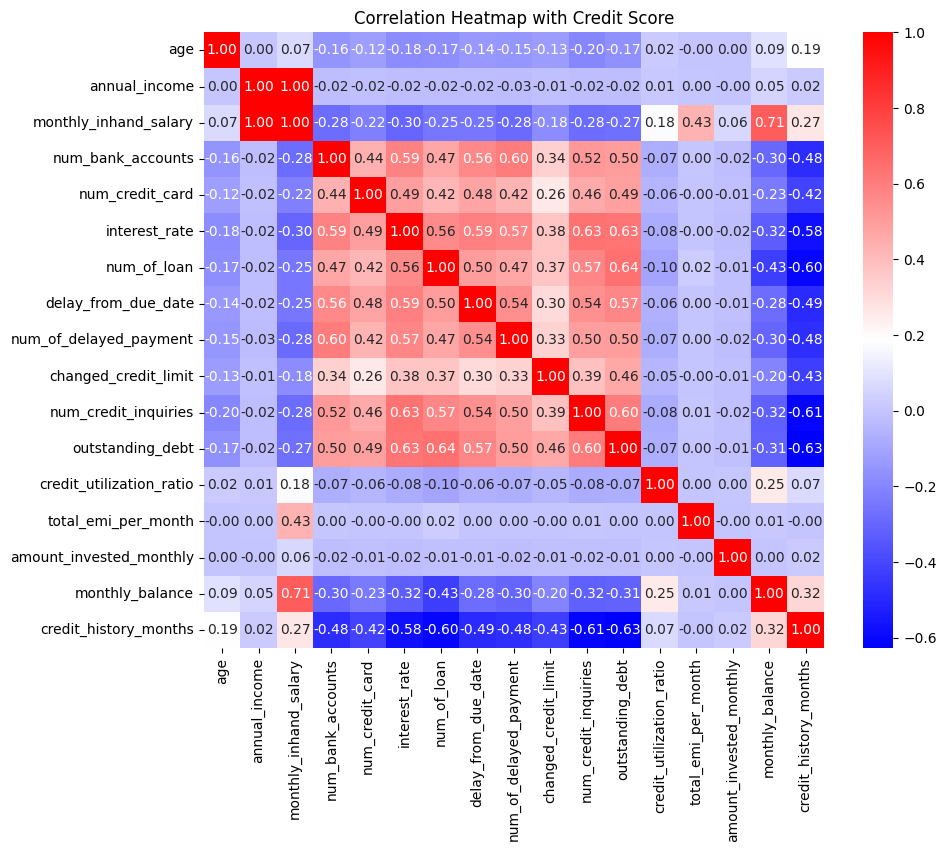

In [221]:
numeric_df = train_df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [222]:
# Because of high correalation annual_income vs. monthly_inhand_salary and some emty values in monthly_inhand_salary, let's drop one of them:
train_df = train_df.drop(columns=['monthly_inhand_salary','ssn', 'id','customer_id','name'])

In [223]:
#Let's save it as clened Dataset
train_df.to_csv("cleaned_df.csv", index=False)